# Social Computing - Summer 2019
# Exercise 1 - Introduction to Python

The Social Computing lecture will be accompanied by six exercise sheets that aim at helping you understand the lecture's topics by dealing with them in more depth, and to familiarize you with practical social computing applications. For your upcoming implementations on these sheets, note that clean and commented code is always a good idea - that way the person who is looking at your solution knows what's going on.

The first exercise contains a small set of programming problems to help you getting warm with the Python programming language. The focus lies in covering Python core concepts and data structures which will be used in the next exercises.

The first thing to do is import the libraries needed. This should be done at the very beginning.

In [1]:
import random, igraph as ig

## Problem 1.1: Fibonacci Series
Write a Python method called fibonacci that takes an integer number N as argument and returns the Fibonacci sequence of length N.

**Note:** A Fibonacci sequence is a sequence of numbers where each number is the sum of the two previous ones. For example, the Fibonacci sequence of length 5 is: 0, 1, 1, 2, 3 (or 1, 1, 2, 3, 5)

In [2]:
def fibonacci(N):
    fib = [0, 1]
    for i in range(2,N):
        fib.append(fib[i-2] + fib[i-1])
    
    return fib

print(fibonacci(5))
print(fibonacci(20))

[0, 1, 1, 2, 3]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


## Problem 1.2: Loops and User Input

In this section, your task is to program a small "Guess the number" game. A number between 1 and 100 should be randomly selected and the player should have 5 tries to guess that number correctly. Each time the player guesses, a hint should be given (higher/lower). At the end, the correct guessed or not guessed number as well as the needed tries to get there should be printed out in the console.

In [3]:
print('Welcome to \'Guess My Number\'!\n')
print('I\'m thinking of a number between 1 and 100.')
print('Try to guess it in as few attempts as possible.\n')

# Initialize values
the_number = random.randint(1, 100)

tries = 0

while (tries < 5):
    user_input = input ("Enter your guess: ")
    try:
        guess = int(user_input)
        if guess > 100 or guess < 1:
            raise ValueError
        
        tries+=1
        if the_number < guess:
            print("lower...")
            
        elif the_number > guess:
            print("higher...")
            
        else:
            print("That's right!")
            break;
            
    except ValueError:
        print("Please enter an integer number from 1 to 100!")
        
print("The correct number was " + str(the_number))
print("Tries: " + str(tries))

Welcome to 'Guess My Number'!

I'm thinking of a number between 1 and 100.
Try to guess it in as few attempts as possible.

Enter your guess: 50
lower...
Enter your guess: 25
lower...
Enter your guess: 10
That's right!
The correct number was 10
Tries: 3


## Problem 1.3: It's Social Computing - we use graphs, a lot of graphs
In social computing research, we need powerful tools to create, manipulate and display graphs. Luckily, there is a plethora of tools and libaries for that. Especially for the second exercise sheet, we are going to use **igraph** which also comes as a [Python library](https://igraph.org/python). It provides rich graph data structures and many out-of-the-box functions to process graphs and calculate different metrics. The tasks below should make you familiar with the library.<br>
You can find its manual [here](https://igraph.org/python/doc/igraph-module.html) and a tutorial [here](https://igraph.org/python/doc/tutorial/tutorial.html).

To give you a short background on graph visualization, it is the research area in mathematics/computer science concerned with drawing graphs. It has applications in many fields, one of them is social computing. The quality of graph visualization is measured based on certain criteria, for example crossing minimization and bend minimization. There are many graph drawing algorithms that vary in their quality according to the graph's application and size. One technique is to draw graphs by using physical analogies.<br>
The basic idea of this technique is to associate edges between graph nodes with physical forces acting upon the nodes and computing an energy minimum. By setting off the dynamics that is induced by the forces, the graph will finally settle into a natural optimal display. A famous algorithm that implements this technique is the **Fruchtermann-Rheingold** algorithm. Its basic idea is to replace the graph edges with mechanical springs, and let the springs move the system to a minimal energy state.


### Task 1: Graph Objects
When using igraph, there is the option of initializing Graph objects by hand or by passing an edgelist. Nevertheless, the library also includes famous graphs that can readily be instantiated and used. **Create a Graph object that represents the _Krackhardt Kite graph_ which is a simple connected, unweighted and undirected social network. Then plot the graph.**

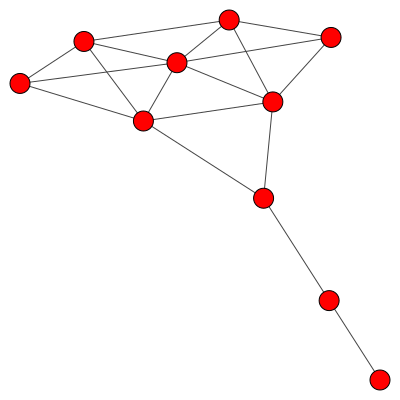

In [4]:
g = ig.Graph.Famous("Krackhardt_Kite")
layout=g.layout_fruchterman_reingold()
ig.plot(g, layout = layout, bbox=(400, 400))

### Task 2: Small World Graph
In the lecture, you learned about the small world graph, also known as _Watts-Strogatz graph_. **Create such a graph with 20 nodes and the following parameters: dimension 1, nodes connected to neighbors of distance of most 3, and rewiring probability 0**

Afterwards, vary the parameters (increase/decrease the dimension, rewiring probability, ...) and run your code again. Also set the layout to Fruchtermann-Reingold and see what happens. **What changes do you observe?** Don't write more than 5 sentences.

Small World Network #1: dim=1, size=20, nei=3, p=0
Transitivity (clustering coefficient): 0.6
Average path length: 2.1052631578947367


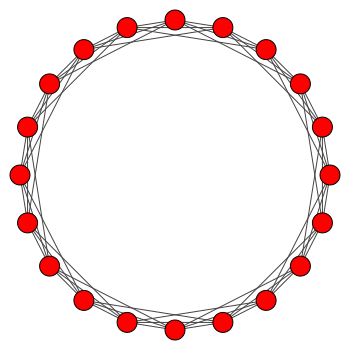

In [5]:
g1 = ig.Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0)
l_circle=g1.layout_circle()

print("Small World Network #1: dim=1, size=20, nei=3, p=0")
print("Transitivity (clustering coefficient): ", end='')
print(g1.transitivity_undirected())
print("Average path length: ", end='')
print(g1.average_path_length())
ig.plot(g1, layout=l_circle, bbox=(350, 350))

Small World Network 2: dim=1, size=20, nei=3, p=0.1
Transitivity (clustering coefficient): 0.41883116883116883
Average path length: 1.805263157894737


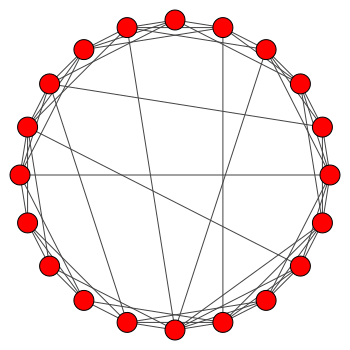

In [6]:
# g2: random rewiring probability p=0.1
g2 = ig.Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0.1)
l_circle=g2.layout_circle()

print("Small World Network 2: dim=1, size=20, nei=3, p=0.1")
print("Transitivity (clustering coefficient): ", end='')
print(g2.transitivity_undirected())
print("Average path length: ", end='')
print(g2.average_path_length())
ig.plot(g2, layout=l_circle, bbox=(350, 350))

Small World Network 3: dim=1, size=20, nei=3, p=0.4
Transitivity (clustering coefficient): 0.35454545454545455
Average path length: 1.8368421052631578


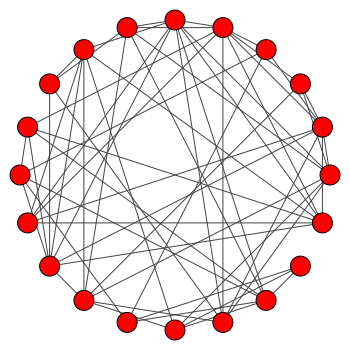

In [7]:
# g3: random rewiring probability p=0.4
g3 = ig.Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0.4)
l_circle=g3.layout_circle()

print("Small World Network 3: dim=1, size=20, nei=3, p=0.4")
print("Transitivity (clustering coefficient): ", end='')
print(g3.transitivity_undirected())
print("Average path length: ", end='')
print(g3.average_path_length())
ig.plot(g3, layout=l_circle, bbox=(350, 350))

Small World Network 4: dim=2, size=7, nei=2, p=0.0
Transitivity (clustering coefficient): 0.45454545454545453
Average path length: 2.0


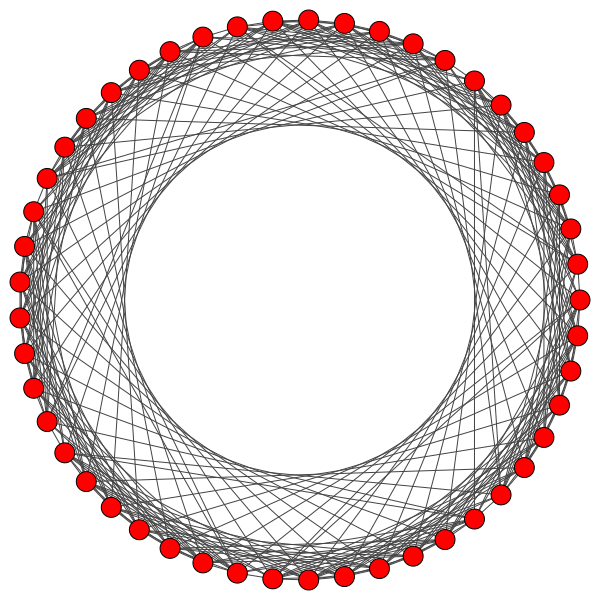

In [8]:
g4 = ig.Graph.Watts_Strogatz(dim=2, size=7, nei=2, p=0.0)
l_circle=g4.layout_circle()

print("Small World Network 4: dim=2, size=7, nei=2, p=0.0")
print("Transitivity (clustering coefficient): ", end='')
print(g4.transitivity_undirected())
print("Average path length: ", end='')
print(g4.average_path_length())
ig.plot(g4, layout=l_circle)

Small World Network 5: dim=1, size=20, nei=3, p=0
with Fruchterman Reingold


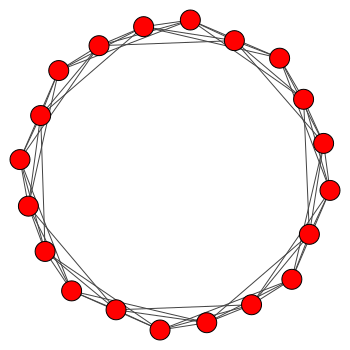

In [9]:
g5 = ig.Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0)
l_fr = g5.layout_fruchterman_reingold()

print("Small World Network 5: dim=1, size=20, nei=3, p=0")
print("with Fruchterman Reingold")
ig.plot(g5, layout=l_fr, bbox=(350, 350))

Small World Network 6: dim=1, size=20, nei=3, p=0.05
with Fruchterman Reingold


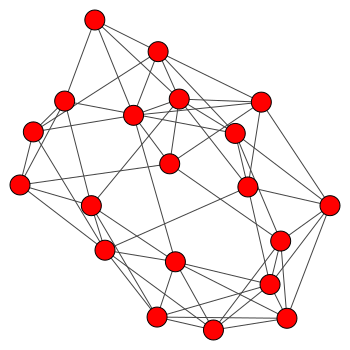

In [10]:
g6 = ig.Graph.Watts_Strogatz(dim=1, size=20, nei=3, p=0.05)
l_fr = g6.layout_fruchterman_reingold()

print("Small World Network 6: dim=1, size=20, nei=3, p=0.05")
print("with Fruchterman Reingold")
ig.plot(g6, layout=l_fr, bbox=(350, 350))

**Observations:**

- Increasing the rewiring probability on a _Watts-Strogatz_ graph, as seen in _Network 2_ (`p=0.1`), reduces clustering coefficient as well as the average path length, because the new random connections may connect two vertices in opposite sides of the circles, which generates a direct route between to previously far away vartices. If we further increase the rewiring probability, as seen in _Network 3_ (`p=0.4`), the clustering coefficient and average path length decrease even further, and the underlying lattice structure becomes impossible to discerne in the vizualization.

- Changing the dimension from 1 to 2, as seen on _Network 4_, the edges will no longer be arranged in a circle, but will now start to form a torus structure, due to the new edges between nodes from different dimensions.

- Changing the layout from circular to _Fruchtermann-Reingold_ does not make a big difference in netwoks with no random rewiring (`p=0`), as one can see when comparing _Network 1_ to _Network 5_ (between which only the representation changes), because the existence of connections to the closest vertices in the circle will generate attractive forces between consecutive nodes, resulting in a final shape resembling a circle. However, if we have some random rewiring, even with a probability as low as `p=0.05`, as in _Network 6_, the _Fruchtermann-Reingold_ layout will no longer resemble a circle, and no structure is discernible - it appears to be randomly generated.